In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

try:
    from google.colab import drive
    drive.mount('/content/drive')
    workding_dir = "/content/drive/MyDrive/logical-reasoning/"
except ModuleNotFoundError:
    workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
import pandas as pd

df = pd.read_csv("results/llama3-8b_lora_sft_bf16-p1_r3.csv")
df

text label title  \
0          甄加索是自杀吗    不是  海岸之谜   
1      甄加索有身体上的疾病吗     是  海岸之谜   
2            画作是甄的     是  海岸之谜   
3           甄有心脏病吗     是  海岸之谜   
4         车轮是凶手留下的    不是  海岸之谜   
...            ...   ...   ...   
2995   哭泣者必须在晚上祭奠吗     是  甄庄哭声   
2996        尸体在湖里吗    不是  甄庄哭声   
2997  哭泣者和死者有特殊关系吗     是  甄庄哭声   
2998    是帽子的主人去世了吗    不是  甄庄哭声   
2999        死者受伤了吗    不是  甄庄哭声   

                                                 puzzle  \
0     在远离城市喧嚣的海边小屋，一天清晨，邻居发现甄加索僵卧在沙滩上，已无生命迹象。现场没有发现任...   
1     在远离城市喧嚣的海边小屋，一天清晨，邻居发现甄加索僵卧在沙滩上，已无生命迹象。现场没有发现任...   
2     在远离城市喧嚣的海边小屋，一天清晨，邻居发现甄加索僵卧在沙滩上，已无生命迹象。现场没有发现任...   
3     在远离城市喧嚣的海边小屋，一天清晨，邻居发现甄加索僵卧在沙滩上，已无生命迹象。现场没有发现任...   
4     在远离城市喧嚣的海边小屋，一天清晨，邻居发现甄加索僵卧在沙滩上，已无生命迹象。现场没有发现任...   
...                                                 ...   
2995  在一个安静的夜晚，小村庄的湖边突然传来了阵阵哭泣声。第二天早晨，村长甄锐发现湖边的石头上放着...   
2996  在一个安静的夜晚，小村庄的湖边突然传来了阵阵哭泣声。第二天早晨，村长甄锐发现湖边的石头上放着...   
2997  在一个安静的夜晚，小村庄的湖边突然传来了阵阵哭泣声。第二天早晨，村长甄锐发现湖边的石头上放着...   
2998  在一个安静的夜晚，小村庄的湖边突然传来了阵阵哭泣声。第二天早晨，村长甄锐发现湖边的石头上放着...   
2999  在一个安静的夜晚，小村庄的湖边突然传来了阵阵哭泣声。第二天早晨，村长甄锐发现湖边的石头上放着...   

                                                  truth  \
0     甄加索是一位热爱自然的画家，他每年都会来到这个海边小屋寻找灵感。在他生命的最后几天，他一直在...   
1     甄加索是一位热爱自然的画家，他每年都会来到这个海边小屋寻找灵感。在他生命的最后几天，他一直在...   
2     甄加索是一位热爱自然的画家，他每年都会来到这个海边小屋寻找灵感。在他生命的最后几天，他一直在...   
3     甄加索是一位热爱自然的画家，他每年都会来到这个海边小屋寻找灵感。在他生命的最后几天，他一直在...   
4     甄加索是一位热爱自然的画家，他每年都会来到这个海边小屋寻找灵感。在他生命的最后几天，他一直在...   
...                                                 ...   
2995  原来，这顶破旧的帽子属于一个小男孩，他小时候与爷爷在湖边生活。爷爷教他钓鱼、游泳，还告诉他湖...   
2996  原来，这顶破旧的帽子属于一个小男孩，他小时候与爷爷在湖边生活。爷爷教他钓鱼、游泳，还告诉他湖...   
2997  原来，这顶破旧的帽子属于一个小男孩，他小时候与爷爷在湖边生活。爷爷教他钓鱼、游泳，还告诉他湖...   
2998  原来，这顶破旧的帽子属于一个小男孩，他小时候与爷爷在湖边生活。爷爷教他钓鱼、游泳，还告诉他湖...   
2999  原来，这顶破旧的帽子属于一个小男孩，他小时候与爷爷在湖边生活。爷爷教他钓鱼、游泳，还告诉他湖...   

     hfl/llama-3-chinese-8b-instruct-v3_torch.bfloat16_lf  \
0                                                   不是。     
1                                                    是。     
2                                               回答：不重要。     
3                                                    是。     
4                                                  不重要。     
...                                                 ...     
2995                                                 是。     
2996                                                不是。     
2997                                                 是。     
2998                                              回答正确。     
2999                                             回答：不是。     

     hfl/llama-3-chinese-8b-instruct-v3/checkpoint-35_torch.bfloat16_lf  \
0                                                    不是                   
1                                                     是                   
2                                                   不重要                   
3                                                     是                   
4                                                    不是                   
...                                                 ...                   
2995                                                不重要                   
2996                                                不重要                   
2997                                                  是                   
2998                                                  是                   
2999                                                 不是                   

     hfl/llama-3-chinese-8b-instruct-v3/checkpoint-70_torch.bfloat16_lf  \
0                                                    不是                   
1                                                     是                   
2                                                     是                   
3                                                     是                   
4                                                    不是                   
...                                                 ...                   
2995                        

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_value_counts(df, column, title=None):
    font_family = rcParams["font.family"]
    # Set the font to SimHei to support Chinese characters
    rcParams["font.family"] = "STHeiti"
    rcParams["axes.unicode_minus"] = False  # This is to support the minus sign in Chinese.

    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind="bar")
    # add values on top of bars
    for i, v in enumerate(df[column].value_counts()):
        plt.text(i, v + 0.1, str(v), ha="center")

    plt.xlabel(title or column)

    plt.show()

    rcParams["font.family"] = font_family

In [7]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'hfl/llama-3-chinese-8b-instruct-v3_torch.bfloat16_lf',
 'hfl/llama-3-chinese-8b-instruct-v3/checkpoint-35_torch.bfloat16_lf',
 'hfl/llama-3-chinese-8b-instruct-v3/checkpoint-70_torch.bfloat16_lf',
 'hfl/llama-3-chinese-8b-instruct-v3/checkpoint-105_torch.bfloat16_lf',
 'hfl/llama-3-chinese-8b-instruct-v3/checkpoint-140_torch.bfloat16_lf',
 'hfl/llama-3-chinese-8b-instruct-v3/checkpoint-175_torch.bfloat16_lf']

********** hfl/llama-3-chinese-8b-instruct-v3_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3_torch.bfloat16_lf
回答正确。                826
不是。                  722
是。                   589
回答：不是。               324
不重要。                 166
回答：是。                129
不是                    75
是                     53
回答：不是                 51
回答错误。                 19
回答：是                  12
回答：不重要。                8
回答：回答正确。               7
重要。                    6
问法错误。                  6
答案：不是。                 3
答案：不是                  1
问题：湖边的石头上放置的帽子是谁的      1
答案是：不是。                1
回答：是男。                 1
Name: count, dtype: int64


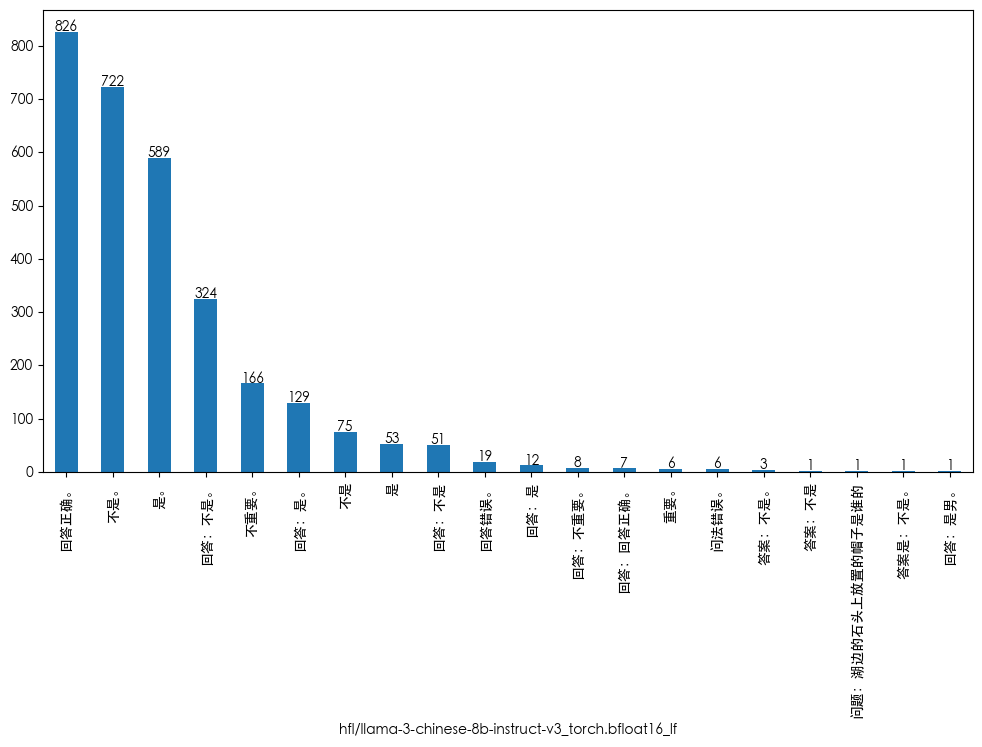

********** hfl/llama-3-chinese-8b-instruct-v3/checkpoint-35_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3/checkpoint-35_torch.bfloat16_lf
不是      1138
是       1100
不重要      671
问法错误      63
回答正确      28
Name: count, dtype: int64


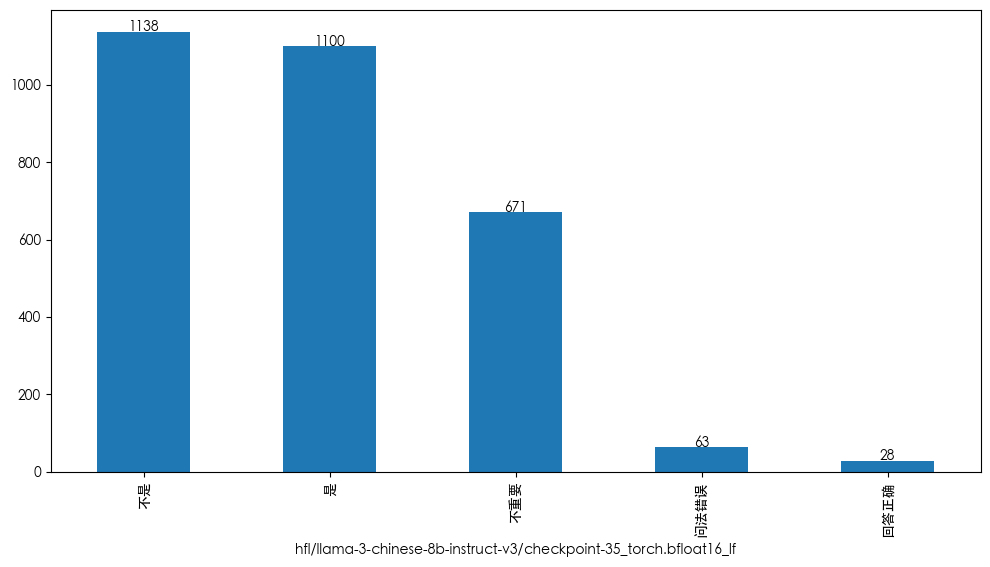

********** hfl/llama-3-chinese-8b-instruct-v3/checkpoint-70_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3/checkpoint-70_torch.bfloat16_lf
不是      1730
是        928
不重要      295
回答正确      31
问法错误      12
物品         2
男          1
小男孩        1
Name: count, dtype: int64


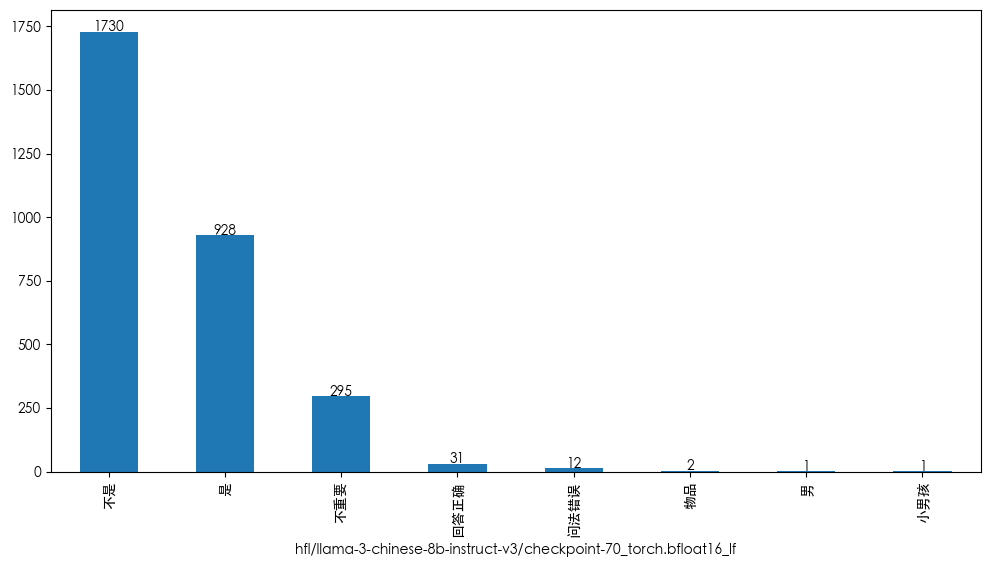

********** hfl/llama-3-chinese-8b-instruct-v3/checkpoint-105_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3/checkpoint-105_torch.bfloat16_lf
不是      1347
是        834
不重要      753
回答正确      33
问法错误      31
小男孩        2
Name: count, dtype: int64


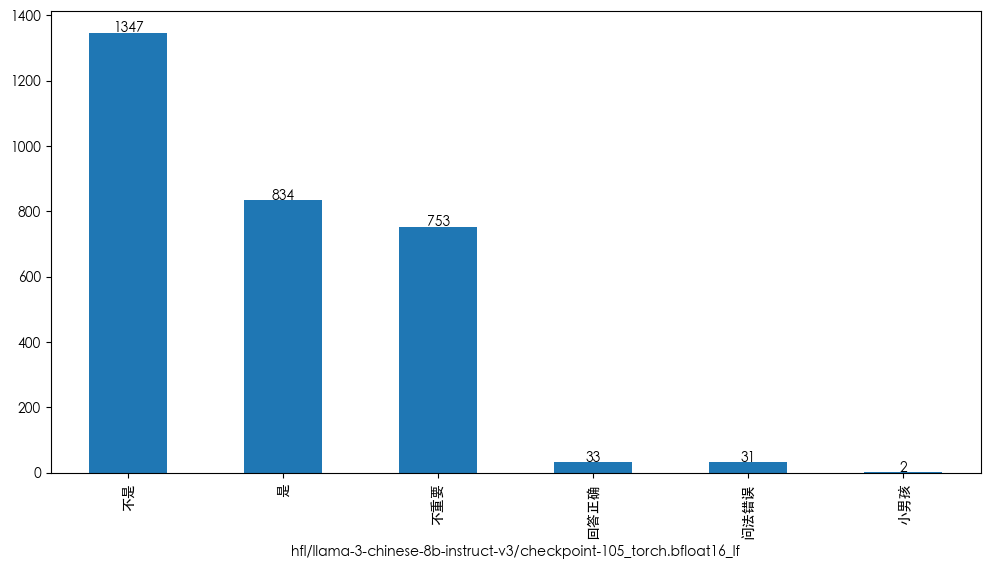

********** hfl/llama-3-chinese-8b-instruct-v3/checkpoint-140_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3/checkpoint-140_torch.bfloat16_lf
不是      1476
是       1036
不重要      395
问法错误      60
回答正确      33
Name: count, dtype: int64


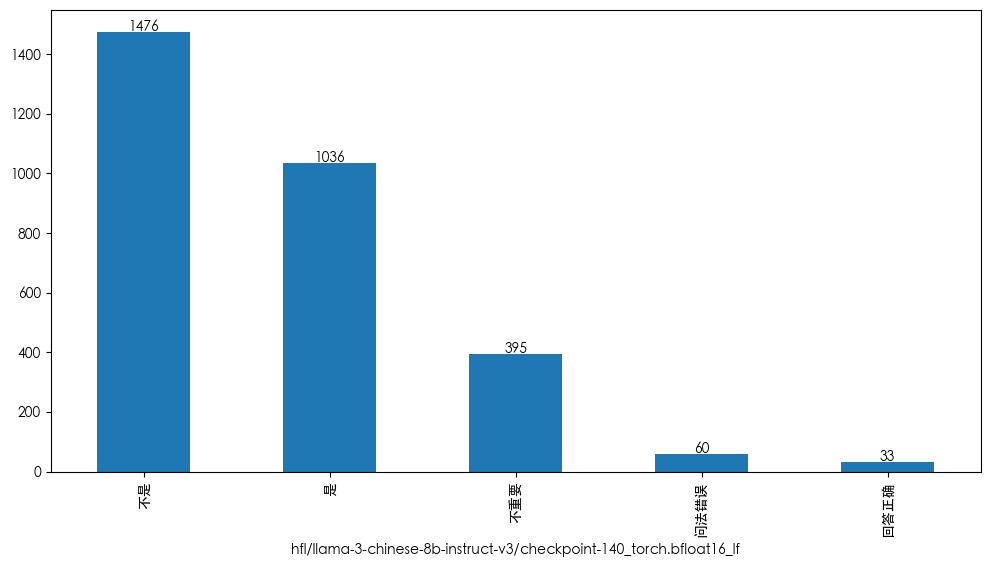

********** hfl/llama-3-chinese-8b-instruct-v3/checkpoint-175_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3/checkpoint-175_torch.bfloat16_lf
不是      1439
是        988
不重要      493
问法错误      48
回答正确      32
Name: count, dtype: int64


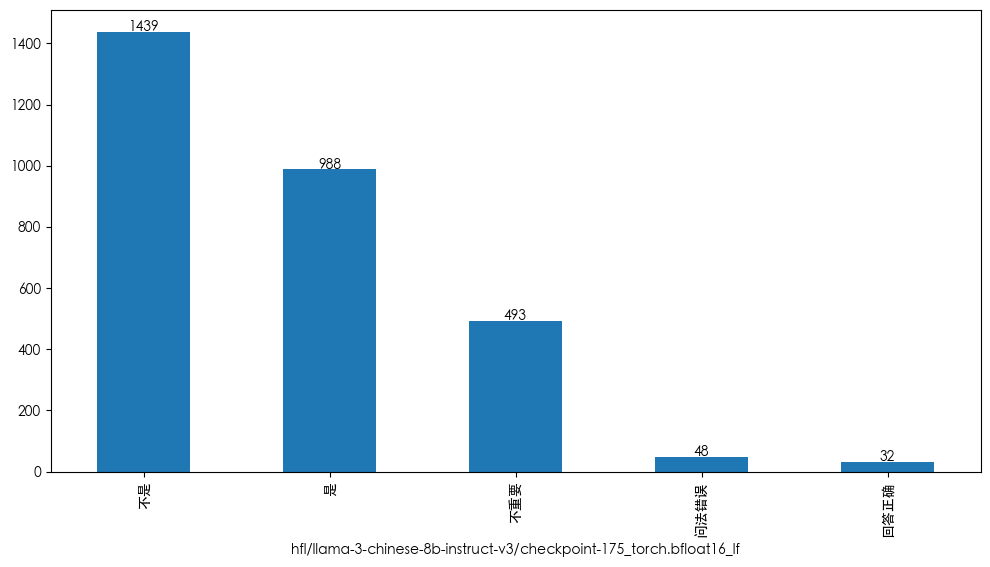

In [8]:
for col in df.columns[5:]:
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col)

In [9]:
import re


def clean_up(df, model_name):
    df[model_name] = df[model_name].apply(
        lambda x: (
            re.sub(r"回答.*是", "是", x.split("\n")[-1])
            .replace("是男孩", "是")
            .replace("是\n问法错误", "问法错误")
            .replace("回答：", "")
            .replace("答案是：", "")
            .replace("答案：", "")
            .replace("。", "")
            .strip()
            if isinstance(x, str)
            else x
        )
    )
    return df

In [10]:
for col in df.columns[5:]:
    df = clean_up(df, col)

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def calc_metrics_for_col(df, col):
    y_true = df["label"]
    y_pred = df[col]
    try:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
        recall = recall_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
        f1 = f1_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
    except Exception as e:
        print(e)
        accuracy = precision = recall = f1 = np.nan

    return accuracy, float(precision), float(recall), float(f1)

In [12]:
import pandas as pd

perf_df = pd.DataFrame(columns=["epoch", "model", "accuracy", "precision", "recall", "f1"])
for i, col in enumerate(df.columns[5:]):
    accuracy, precision, recall, f1 = calc_metrics_for_col(df, col)
    new_model_metrics = {"epoch": i / 5, "model": col, "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

    # Convert the dictionary to a DataFrame and concatenate it with the existing DataFrame
    perf_df = pd.concat([perf_df, pd.DataFrame([new_model_metrics])], ignore_index=True)

perf_df

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_92555/1032819893.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat([perf_df, pd.DataFrame([new_model_metrics])], ignore_index=True)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in l

epoch                                              model  accuracy  \
0    0.0  hfl/llama-3-chinese-8b-instruct-v3_torch.bfloa...  0.456333   
1    0.2  hfl/llama-3-chinese-8b-instruct-v3/checkpoint-...  0.640667   
2    0.4  hfl/llama-3-chinese-8b-instruct-v3/checkpoint-...  0.722333   
3    0.6  hfl/llama-3-chinese-8b-instruct-v3/checkpoint-...  0.625667   
4    0.8  hfl/llama-3-chinese-8b-instruct-v3/checkpoint-...  0.717333   
5    1.0  hfl/llama-3-chinese-8b-instruct-v3/checkpoint-...  0.688000   

   precision    recall        f1  
0   0.674450  0.456333  0.530122  
1   0.765241  0.640667  0.686507  
2   0.761495  0.722333  0.729669  
3   0.769429  0.625667  0.674742  
4   0.774693  0.717333  0.739105  
5   0.767848  0.688000  0.718197

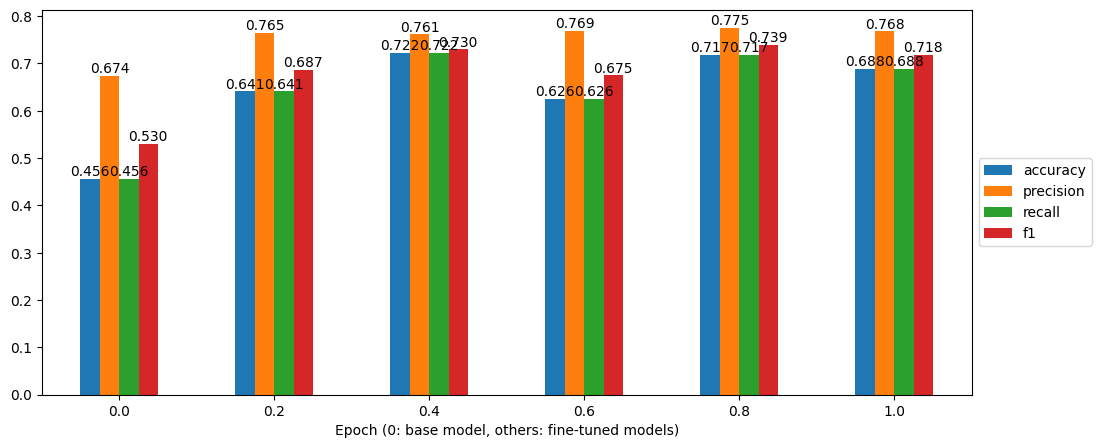

In [13]:
# plot metrics for each model
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

perf_df.plot(x="epoch", y=["accuracy", "precision", "recall", "f1"], kind="bar", ax=ax)

# add values on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.3f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
    )

# add title and labels
# ax.set_title("Metrics for different settings")
# ax.set_ylabel("Value")
ax.set_xlabel("Epoch (0: base model, others: fine-tuned models)")
# rotate x labels
plt.xticks(rotation=0)

# set legend at the right to avoid overlapping with bars
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
# plt.tight_layout()

plt.show()

In [14]:
perf_df.to_csv("results/mgtv-llama3_p1_r3_full_metrics.csv", index=False)

In [15]:
perf_df["accuracy"].to_list()

[0.4563333333333333,
 0.6406666666666667,
 0.7223333333333334,
 0.6256666666666667,
 0.7173333333333334,
 0.688]

********** hfl/llama-3-chinese-8b-instruct-v3_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3_torch.bfloat16_lf
是                    1158
回答正确                  833
不是                    802
不重要                   174
回答错误                   19
重要                      6
问法错误                    6
问题：湖边的石头上放置的帽子是谁的       1
是男                      1
Name: count, dtype: int64


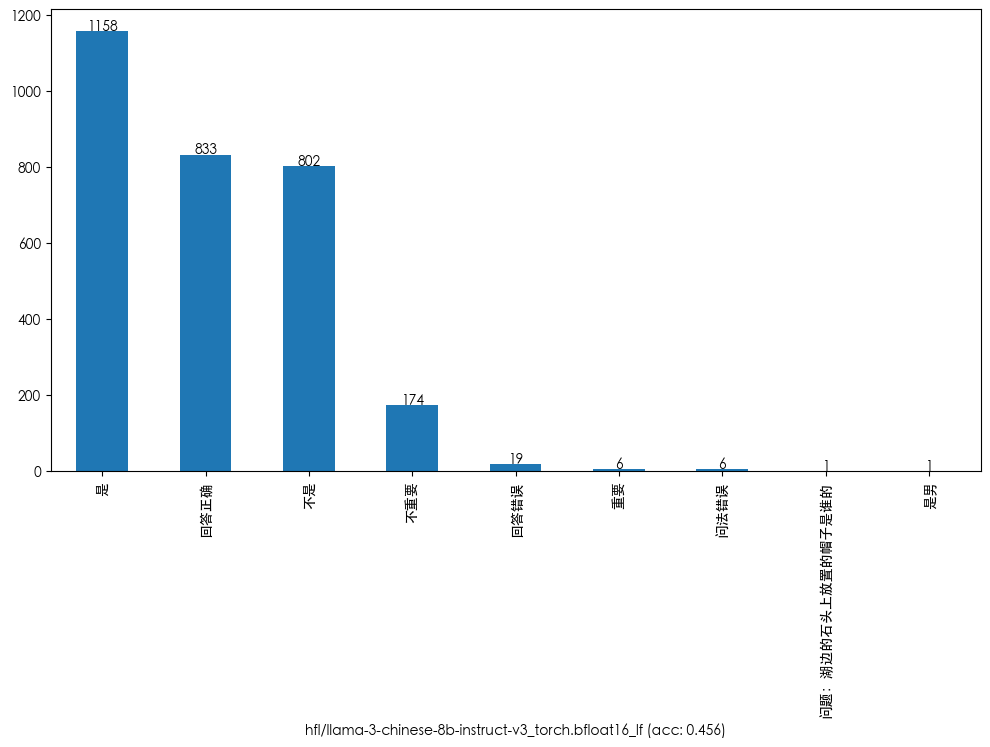

********** hfl/llama-3-chinese-8b-instruct-v3/checkpoint-35_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3/checkpoint-35_torch.bfloat16_lf
不是      1138
是       1100
不重要      671
问法错误      63
回答正确      28
Name: count, dtype: int64


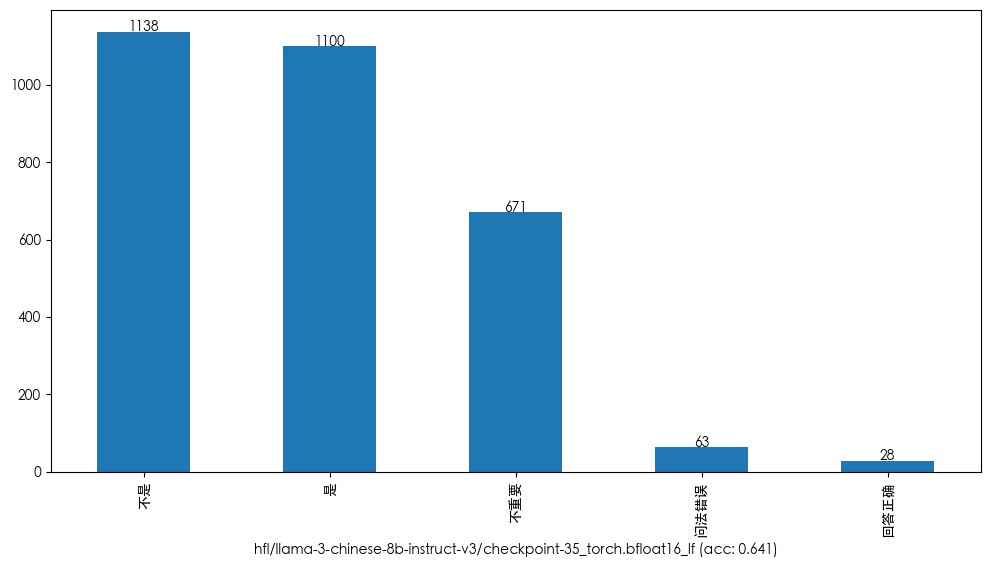

********** hfl/llama-3-chinese-8b-instruct-v3/checkpoint-70_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3/checkpoint-70_torch.bfloat16_lf
不是      1730
是        928
不重要      295
回答正确      31
问法错误      12
物品         2
男          1
小男孩        1
Name: count, dtype: int64


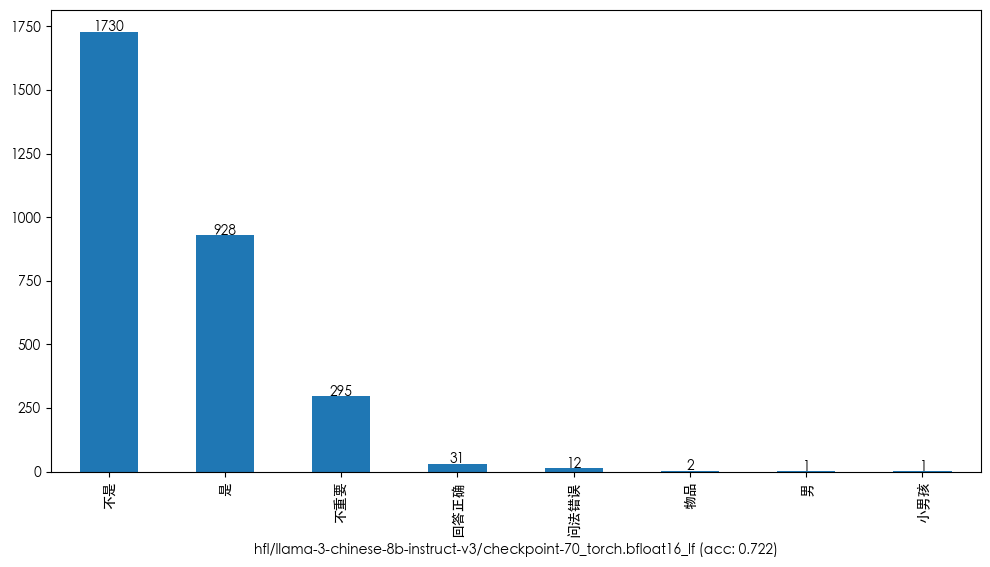

********** hfl/llama-3-chinese-8b-instruct-v3/checkpoint-105_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3/checkpoint-105_torch.bfloat16_lf
不是      1347
是        834
不重要      753
回答正确      33
问法错误      31
小男孩        2
Name: count, dtype: int64


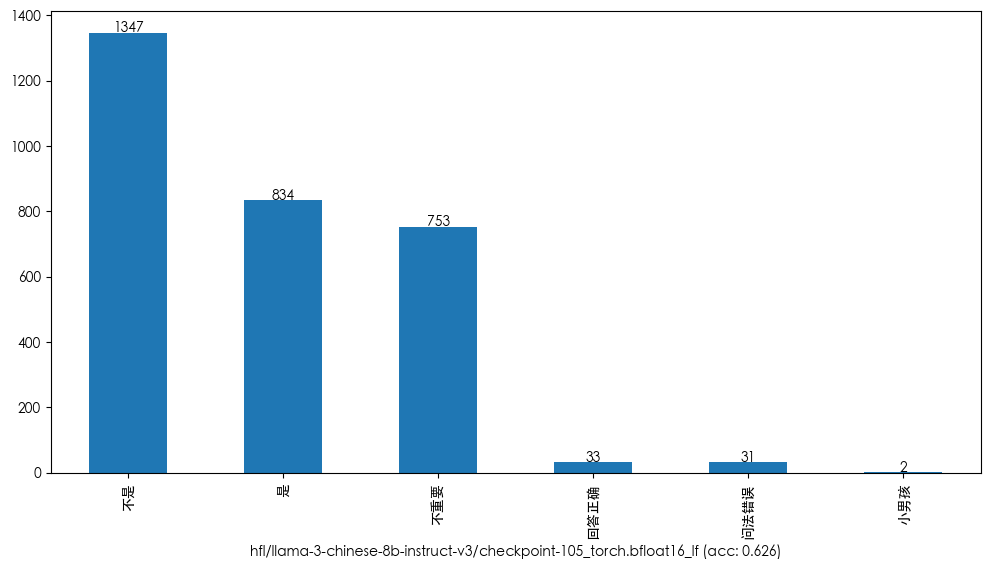

********** hfl/llama-3-chinese-8b-instruct-v3/checkpoint-140_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3/checkpoint-140_torch.bfloat16_lf
不是      1476
是       1036
不重要      395
问法错误      60
回答正确      33
Name: count, dtype: int64


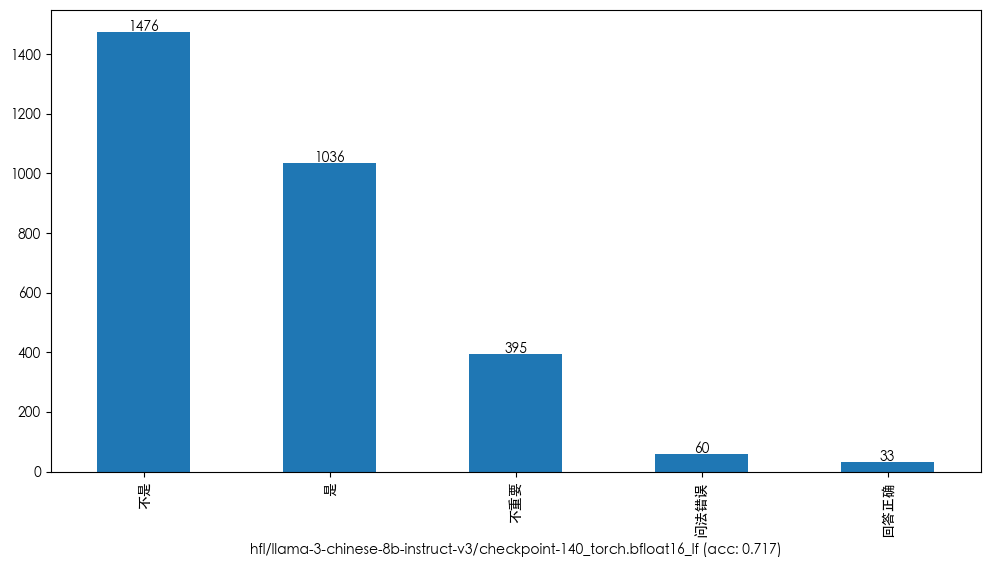

********** hfl/llama-3-chinese-8b-instruct-v3/checkpoint-175_torch.bfloat16_lf **********
hfl/llama-3-chinese-8b-instruct-v3/checkpoint-175_torch.bfloat16_lf
不是      1439
是        988
不重要      493
问法错误      48
回答正确      32
Name: count, dtype: int64


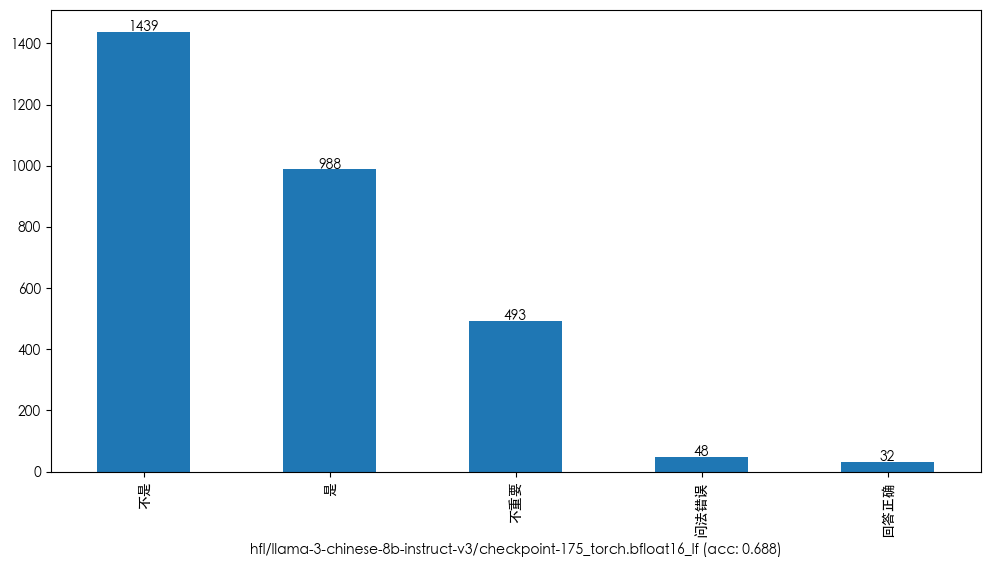

In [16]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, f"{col} (acc: {accuracy:.3f})")